# Problem Statement

Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers. 

In [301]:
import numpy as np
import pandas as pd
import os
os.chdir("G:\kaggle data set\Loan Prediction(Analytics Vidhya)")
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style

# Load Train Data

In [302]:
train = pd.read_csv("train.csv")
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# Load Test Data

In [303]:
test = pd.read_csv("test.csv")
test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [304]:
# check duplicate records in train dataset.
train.duplicated().sum()

0

In [305]:
# check duplicate records in test dataset.
test.duplicated().sum()

0

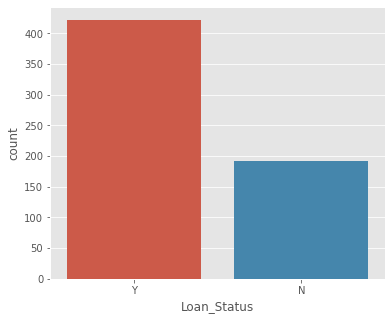

In [306]:
#check how much of customers got loan approval.
plt.figure(figsize=(6,5))
sns.countplot(train["Loan_Status"])

In [307]:
train['Loan_Status'].value_counts(normalize=True)

#almost 69% customers got loan.

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

# EDA

In [6]:
#check null values in train and test both datasets.
train_nan_feature = [feature for feature in train.columns if train[feature].isnull().sum()>1]
train_nan_feature

['Gender',
 'Married',
 'Dependents',
 'Self_Employed',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [7]:
#Sum of Null values in train dataset.
train[train_nan_feature].isnull().sum()

Gender              13
Married              3
Dependents          15
Self_Employed       32
LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
dtype: int64

In [8]:
test_nan_feature = [feature for feature in test.columns if test[feature].isnull().sum()>1]
test_nan_feature

['Gender',
 'Dependents',
 'Self_Employed',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [9]:
#Sum of Null values in test dataset.
test[test_nan_feature].isnull().sum()

Gender              11
Dependents          10
Self_Employed       23
LoanAmount           5
Loan_Amount_Term     6
Credit_History      29
dtype: int64

# Gender

In [10]:
train["Gender"].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

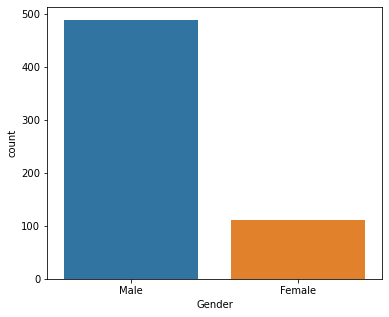

In [11]:
plt.figure(figsize=(6,5))
sns.countplot(train["Gender"])

from upper visualization it's clear that male applicants are almost 80% in dataset.

Text(0, 0.5, 'Percentage')

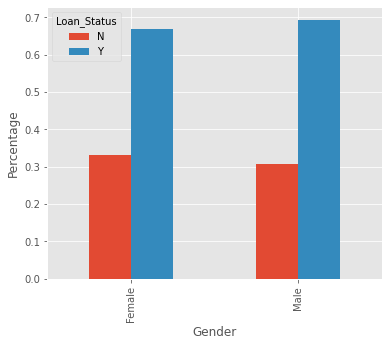

In [12]:
#Percentage of loan approved in Gender feature.

crosstab = pd.crosstab(train["Gender"],train["Loan_Status"])

style.use("ggplot")

crosstab.div(crosstab.sum(1).astype(float),axis=0).plot(kind="bar",figsize=(6,5))
plt.ylabel("Percentage")

In [13]:
# male and female both are got equally approved and unapproved loans.

# Married Feature

In [14]:
train["Married"].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

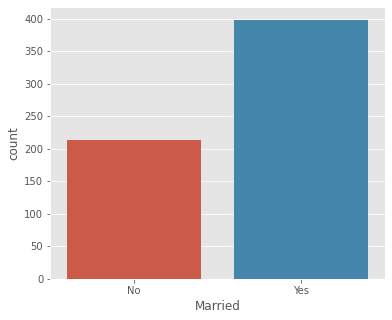

In [15]:
plt.figure(figsize=(6,5))
sns.countplot(train["Married"])

In [16]:
# Around 65% of the applicants in the dataset are married.

Text(0, 0.5, 'Percentage')

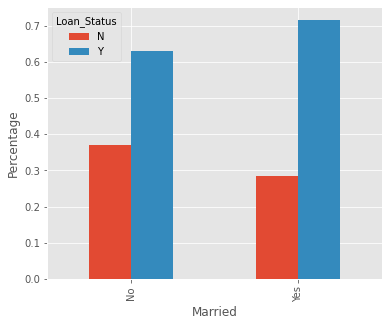

In [17]:
#Percentage of loan approval in Married feature.

crosstab = pd.crosstab(train["Married"],train["Loan_Status"]) 
style.use("ggplot")
crosstab.div(crosstab.sum(1).astype(float),axis=0).plot(kind="bar",figsize=(6,5))
plt.ylabel("Percentage")

In [ ]:
# married applicants is getting more approval  for loans.

# Dependents

In [18]:
train["Dependents"].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [19]:
train["Dependents"].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

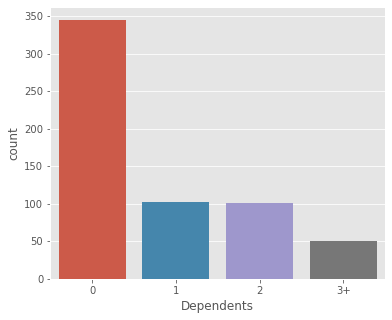

In [20]:
plt.figure(figsize=(6,5))
sns.countplot(train["Dependents"])

In [ ]:
# more than half of the applicants don’t have any dependents.

Text(0, 0.5, 'Percentage')

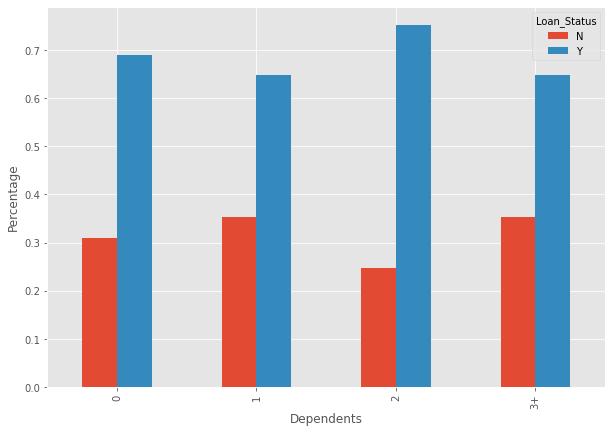

In [21]:
#Percentage of loan approval in Dependents feature.

crosstab = pd.crosstab(train["Dependents"],train["Loan_Status"])
crosstab.div(crosstab.sum(1).astype(float),axis=(0)).plot(kind="bar",figsize=(10,7))
plt.ylabel("Percentage")

In [ ]:
# applicants with 1 or 3+ dependents is similar across both the categories of Loan_Status

# Education

In [22]:
train["Education"].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [23]:
train["Education"].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

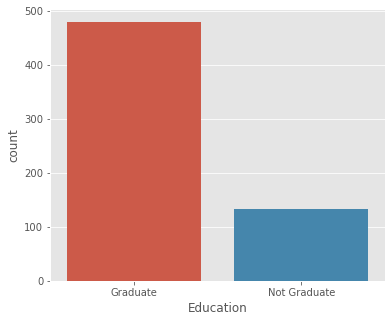

In [24]:
plt.figure(figsize=(6,5))
sns.countplot(train["Education"])

In [ ]:
# Around 80% of the applicants are Graduate.

Text(0, 0.5, 'Percentage')

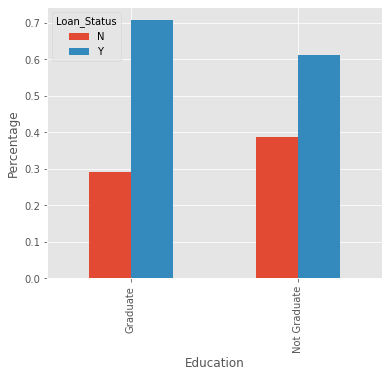

In [25]:
#Percentage of Loan approval in Education feature.

crosstab = pd.crosstab(train["Education"],train["Loan_Status"])
crosstab.div(crosstab.sum(1).astype(float),axis=0).plot(kind="bar", figsize=(6,5))
plt.ylabel("Percentage")

In [ ]:
# from upper graph it's clear that Graduated customers got more loan approval.

# Self_Employed

In [26]:
train["Self_Employed"].unique()

array(['No', 'Yes', nan], dtype=object)

In [27]:
train["Self_Employed"].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

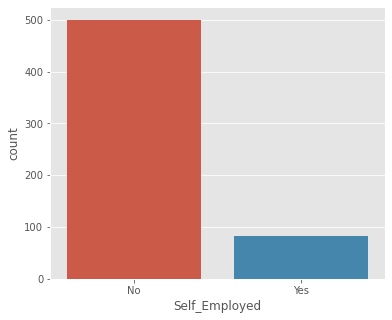

In [28]:
plt.figure(figsize=(6,5))
sns.countplot(train["Self_Employed"])

In [ ]:
# from upper graph it's clear that around 80% applicants in the dataset are not self employed.

Text(0, 0.5, 'Percentage')

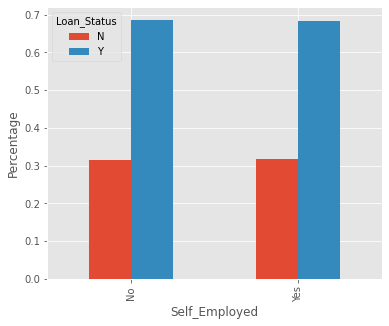

In [29]:
#Percentage of loan approval customers in Self_Education Feature.

crosstab = pd.crosstab(train["Self_Employed"],train["Loan_Status"])
style.use("ggplot")
crosstab.div(crosstab.sum(1).astype(float),axis=0).plot(kind="bar",figsize=(6,5))
plt.ylabel("Percentage")

In [ ]:
# if customer is self_employed or not it does'nt matter, both of type's getting almost equally loan approval.

# Applicant Income feature

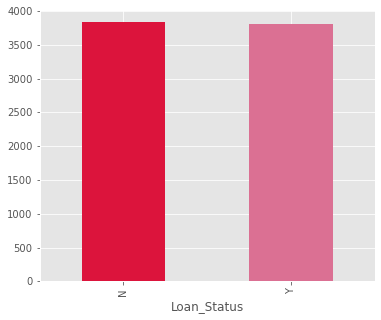

In [30]:
train.groupby("Loan_Status")["ApplicantIncome"].median().plot(kind="bar",figsize=(6,5),color=["crimson","palevioletred"])

from upper graph it's clear that Applicant Income does'nt matter for loan approval,don’t see any significant difference in the mean income between those approval and not approved applicant

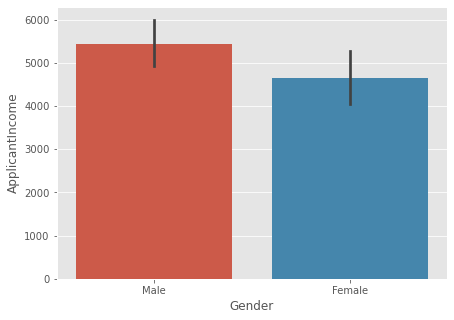

In [31]:
# Male and Female applicant Income.
plt.figure(figsize=(7,5))
sns.barplot(x=train.Gender, y= train.ApplicantIncome, estimator= np.mean)

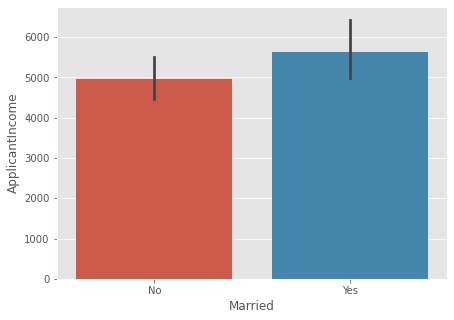

In [32]:
# Married and Un-Maried applicant Income.
plt.figure(figsize=(7,5))
sns.barplot(x=train.Married, y= train.ApplicantIncome, estimator= np.mean)

Married applicant's have high income incomparison of non-married.

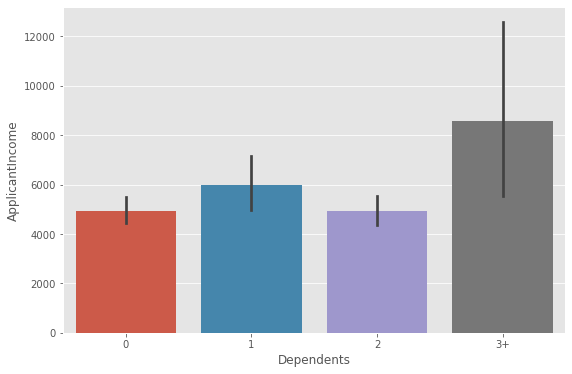

In [33]:
#Applicant Income with Dependents.
plt.figure(figsize=(9,6))
sns.barplot(x=train.Dependents, y=train.ApplicantIncome, estimator=np.mean)

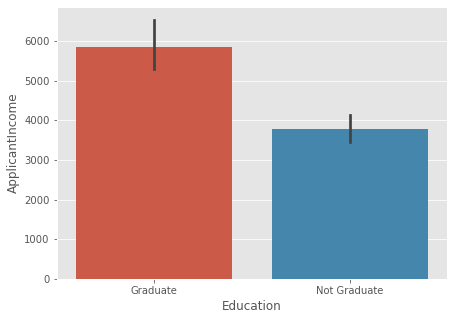

In [34]:
#Graduate and Not Graduate Applicant Income.
plt.figure(figsize=(7,5))
sns.barplot(x=train.Education, y=train.ApplicantIncome, estimator=np.mean)

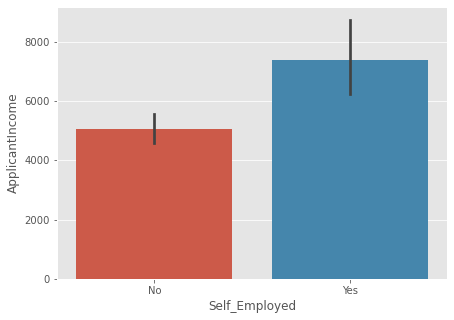

In [35]:
#Self_Employed and Not_Self_Employed Applicant Income.
plt.figure(figsize=(7,5))
sns.barplot(x=train.Self_Employed, y=train.ApplicantIncome, estimator=np.mean)

Self Employed Customers have High Income in comparison of Not_Self Employed customers.

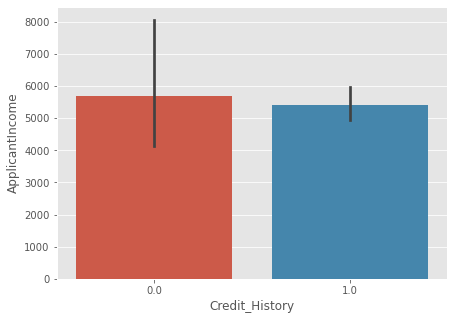

In [36]:
#Credit_History_meets to guidelines or credit_history_not_meets to guidelines Applicant Income.
plt.figure(figsize=(7,5))
sns.barplot(x=train.Credit_History, y=train.ApplicantIncome, estimator=np.mean)

# Coapplicant Income feature

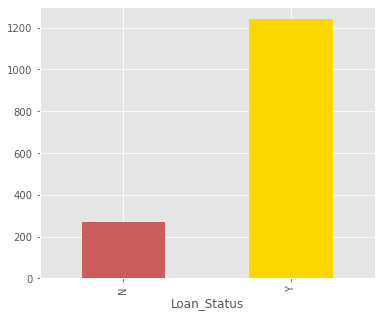

In [37]:
train.groupby("Loan_Status")["CoapplicantIncome"].median().plot(kind="bar",figsize=(6,5),color=["indianred","gold"])

from upper graph it's clear that if co-applicant has also high income than the chance for loan approval is High.

# Loan Amount feature

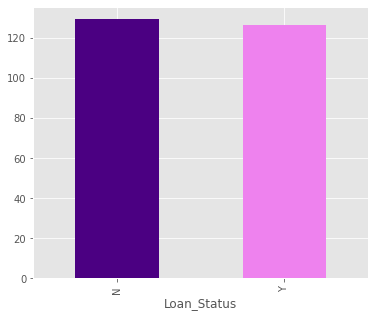

In [38]:
train.groupby("Loan_Status")["LoanAmount"].median().plot(kind="bar",figsize=(6,5),color=["indigo","violet"])

Loan Amount Does'nt matter for Loan approval 

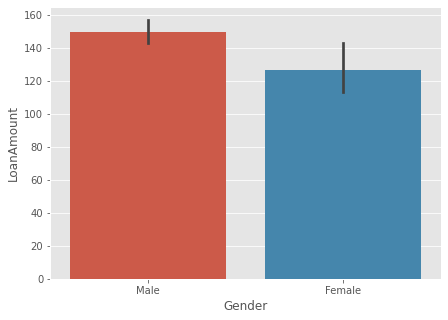

In [39]:
# Male and Female applicant Average Loan Amount.
plt.figure(figsize=(7,5))
sns.barplot(x=train.Gender, y=train.LoanAmount, estimator=np.mean)

Male applicant are more, so Male Average Loan Amount also High.

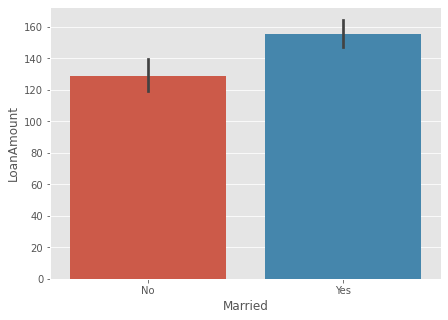

In [40]:
# Married and Un-Maried applicant Average Laon Amount.
plt.figure(figsize=(7,5))
sns.barplot(x=train.Married, y= train.LoanAmount, estimator= np.mean)

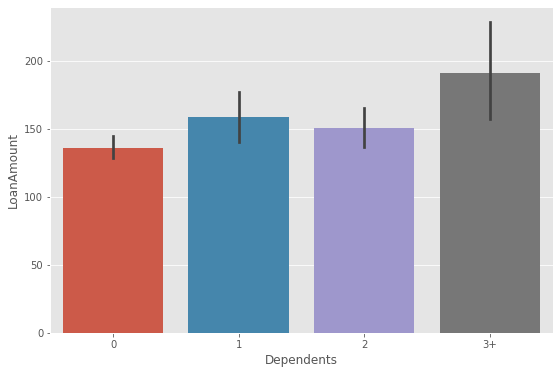

In [41]:
#Average Loan Amount applicant with Dependents.
plt.figure(figsize=(9,6))
sns.barplot(x=train.Dependents, y=train.LoanAmount, estimator=np.mean)

if Dependents are more than three average Loan Amount also High

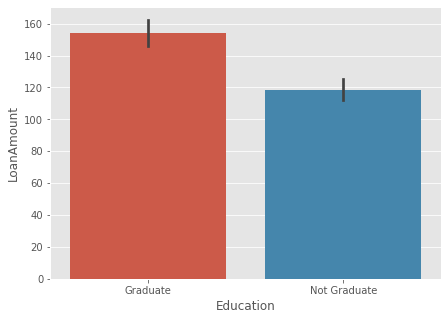

In [42]:
#Graduate and Not Graduate applicant Average Loan Amount.
plt.figure(figsize=(7,5))
sns.barplot(x=train.Education, y=train.LoanAmount, estimator=np.mean)

Graduate customer's are taking high loan Amount.

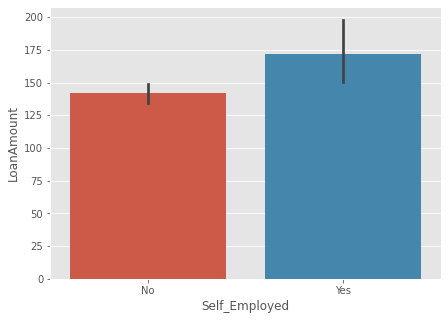

In [43]:
#Self_Employed and Not_Self_Employed Applicant Average Loan Amount.
plt.figure(figsize=(7,5))
sns.barplot(x=train.Self_Employed, y=train.LoanAmount, estimator=np.mean)

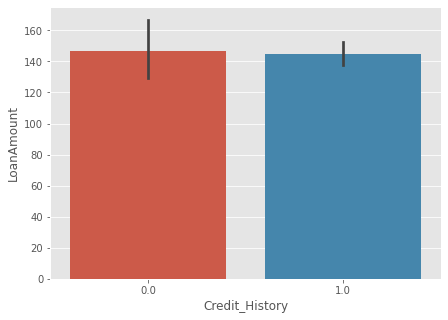

In [44]:
#Credit_History_meets to guidelines or credit_history_not_meets to guidelines Applicant Average Loan Amount.
plt.figure(figsize=(7,5))
sns.barplot(x=train.Credit_History, y=train.LoanAmount, estimator=np.mean)

meets credit_history to guidelines or not meets credit_history to guidelines both type of applicant's applying for equal Loan Amount.

# Loan_Amount_Term in Months

In [45]:
train["Loan_Amount_Term"].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [46]:
train["Loan_Amount_Term"].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

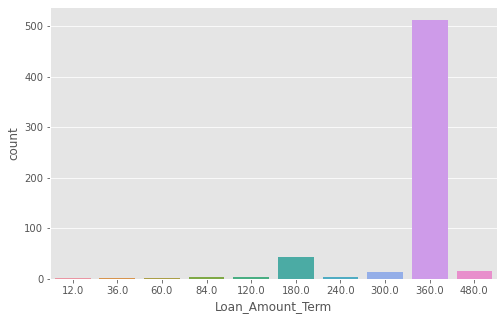

In [47]:
plt.figure(figsize=(8,5))
sns.countplot(train["Loan_Amount_Term"])

mostly customer's prefer 360 Months(30 years) for loan repay 

Text(0, 0.5, 'Percentage')

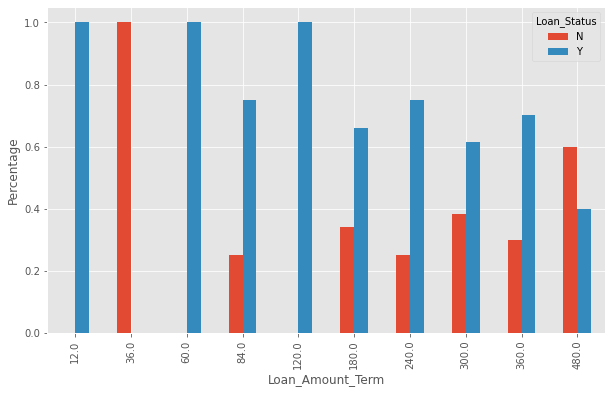

In [48]:
# Percentage of loan approvel in Loan Amount Term feature.

crosstab = pd.crosstab(train["Loan_Amount_Term"],train["Loan_Status"])
style.use("ggplot")
crosstab.div(crosstab.sum(1).astype(float),axis=(0)).plot(kind="bar",figsize=(10,6))
plt.ylabel("Percentage")

# Credit_History feature

In [49]:
train["Credit_History"].unique()

array([ 1.,  0., nan])

In [50]:
train["Credit_History"].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

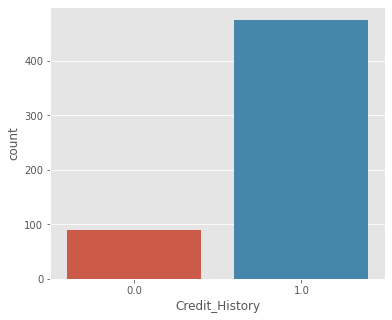

In [51]:
plt.figure(figsize=(6,5))
sns.countplot(train["Credit_History"])

most of applicants meets credit_history guidelines

Text(0, 0.5, 'Percentage')

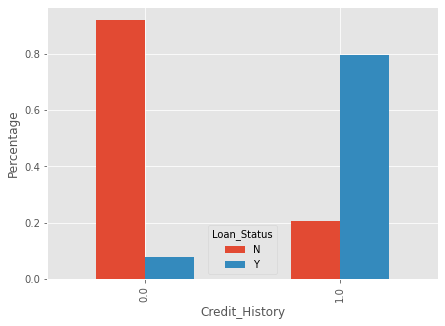

In [52]:
#Percentage of Loan approval in Credit History Feature.

crosstab = pd.crosstab(train["Credit_History"],train['Loan_Status'])
style.use("ggplot")
crosstab.div(crosstab.sum(1).astype(float),axis=(0)).plot(kind="bar",figsize=(7,5))
plt.ylabel("Percentage")

from upper bar plot it's clear that if credit_history don't meets to guidelines than the chances for loan approval is low, and if credit_history_meets to guidelines than chances for loan approval is High.

# Property_Area feature

In [53]:
train["Property_Area"].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [54]:
train["Property_Area"].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

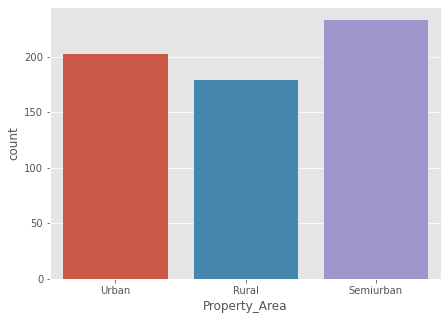

In [55]:
plt.figure(figsize=(7,5))
sns.countplot(train["Property_Area"])

Text(0, 0.5, 'Percentage')

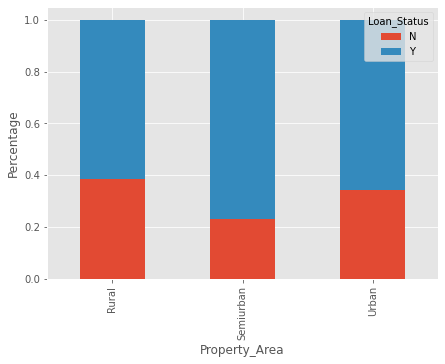

In [56]:
#Percentage of Loan approval in Property_Area Feature.

crosstab = pd.crosstab(train["Property_Area"],train['Loan_Status'])
style.use("ggplot")
crosstab.div(crosstab.sum(1).astype(float),axis=(0)).plot(kind="bar",figsize=(7,5),stacked=True)
plt.ylabel("Percentage")

from semiurban class applicant got more loan approval incomparison of Rural and urban.

# Handle Missing Values

Missing values in Gender column.

In [57]:
train.Gender.isnull().sum()

13

In [58]:
train.Gender.value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [59]:
# fill na values by Mode value.

train["Gender"] = train["Gender"].fillna("Male")
test["Gender"] = test["Gender"].fillna("Male")

Missing Value's in Married Feature

In [60]:
train["Married"].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [61]:
# fill na values by Mode value.

train["Married"] = train["Married"].fillna("Yes")
test["Married"] = test["Married"].fillna("Yes")

Missing values in Dependents Features

In [62]:
train["Dependents"].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [63]:
# fill na values by Mode value.

train["Dependents"] = train["Dependents"].fillna(0)
test["Dependents"] = test["Dependents"].fillna(0)

Missing values in Self_Employed Features

In [64]:
train["Self_Employed"].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [65]:
# fill na values by Mode value.

train["Self_Employed"] = train["Self_Employed"].fillna("No")
test["Self_Employed"] = test["Self_Employed"].fillna("No")

Missing values in Loan_Amount_Term Features.

In [66]:
train["Loan_Amount_Term"].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [67]:
# fill na values by Mode value.

train["Loan_Amount_Term"] = train["Loan_Amount_Term"].fillna(360.0)
test["Loan_Amount_Term"] = test["Loan_Amount_Term"].fillna(360.0)

Missing values in Credit_History Features.

In [68]:
train["Credit_History"].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [69]:
# fill na values by Mode value.

train["Credit_History"] = train["Credit_History"].fillna(1.0)
test["Credit_History"] = test["Credit_History"].fillna(1.0)

Missing values in LoanAmount

In [70]:
# fill missing value by Random Sample Imputation.

random_sample = train["LoanAmount"].dropna().sample(train["LoanAmount"].isnull().sum(),random_state=0)

random_sample.index = train[train["LoanAmount"].isnull()].index

train["LoanAmount_random"] = train["LoanAmount"].fillna(random_sample)

In [71]:
# fill missing value by Random Sample Imputation in test dataset

random_sample = test["LoanAmount"].dropna().sample(test["LoanAmount"].isnull().sum(),random_state=0)

random_sample.index = test[test["LoanAmount"].isnull()].index

test["LoanAmount_random"] = test["LoanAmount"].fillna(random_sample)

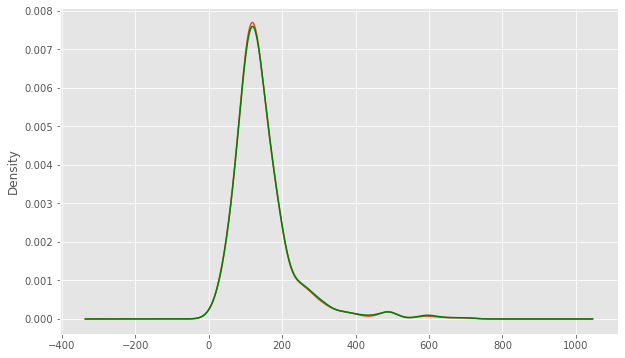

In [72]:
# check Distribution of Loan Amount Feature after imputing nan values by random sampling.
plt.figure(figsize=(10,6))
train["LoanAmount"].plot(kind="kde")
train["LoanAmount_random"].plot(kind="kde",c="green")

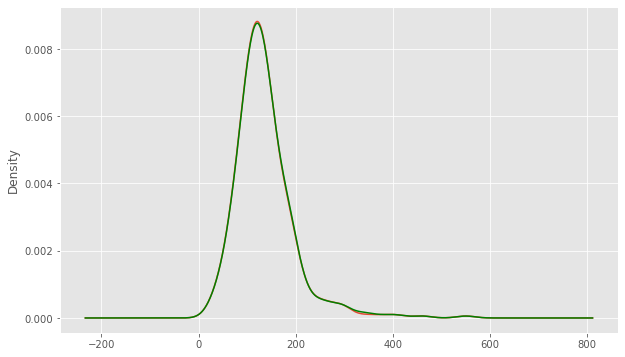

In [73]:
# similarly check in Distribution of Loan Amount Feature after imputing nan values by random sampling
plt.figure(figsize=(10,6))
test["LoanAmount"].plot(kind="kde")
test["LoanAmount_random"].plot(kind="kde",c="green")

In [74]:
#Thats the advantage of random sampling distortion doesn't change.

In [75]:
train = train.drop("LoanAmount",axis=1)
test = test.drop("LoanAmount",axis=1)

In [76]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_random    0
dtype: int64

In [77]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
LoanAmount_random    0
dtype: int64

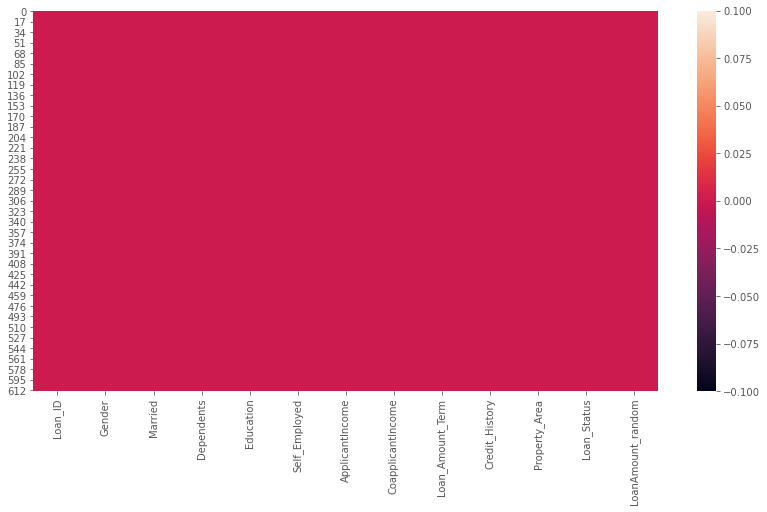

In [78]:
#Again Check null values by visualization
plt.figure(figsize=(14,7))
sns.heatmap(train.isnull())

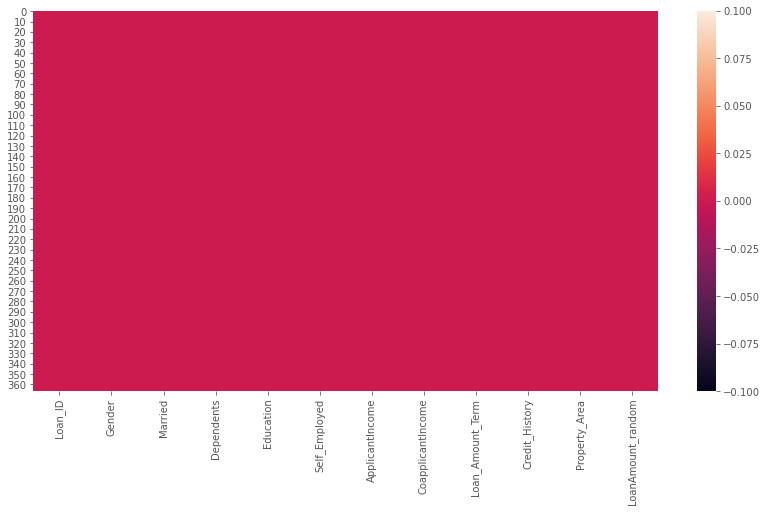

In [79]:
#Again Check null values by visualization in test dataset
plt.figure(figsize=(14,7))
sns.heatmap(test.isnull())

In [80]:
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_random
0,LP001002,Male,No,0,Graduate,No,5849,0.0,360.0,1.0,Urban,Y,255.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,360.0,1.0,Rural,N,128.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,360.0,1.0,Urban,Y,66.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,360.0,1.0,Urban,Y,120.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,360.0,1.0,Urban,Y,141.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,360.0,1.0,Rural,Y,71.0
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,180.0,1.0,Rural,Y,40.0
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,360.0,1.0,Urban,Y,253.0
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,360.0,1.0,Urban,Y,187.0


# Check outliers and apply Transformations

In [81]:
import scipy.stats as st
import pylab

In [82]:
#function for qq-plot

def qq_plot(data_frame, feature_name):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    st.probplot(data_frame[feature_name],dist="norm", plot=pylab)
    plt.subplot(1,2,2)
    data_frame[feature_name].hist()
    plt.show()

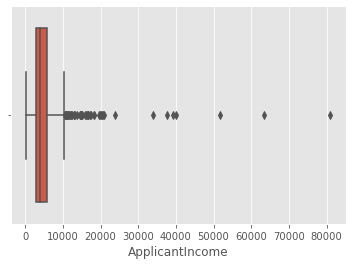

In [83]:
# check outliers by boxplot

sns.boxplot(train.ApplicantIncome)

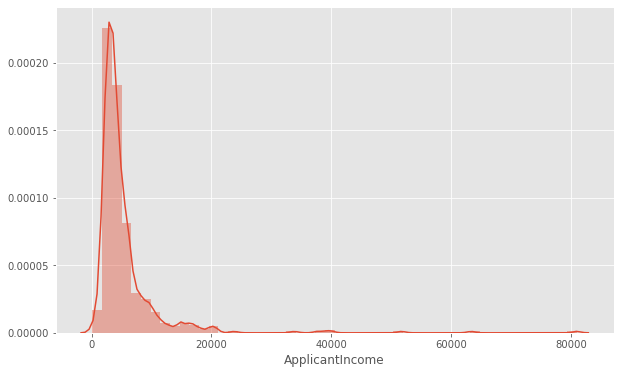

In [84]:
plt.figure(figsize=(10,6))

sns.distplot(train["ApplicantIncome"])

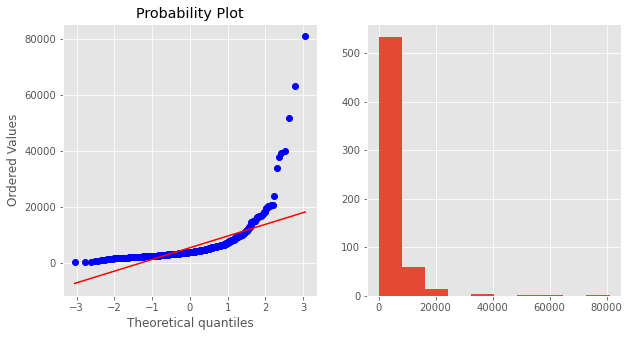

In [85]:
#check distribution by qq-plot.

qq_plot(train,"ApplicantIncome")

Apply some transformation techniques to make distribution as normally distributed.

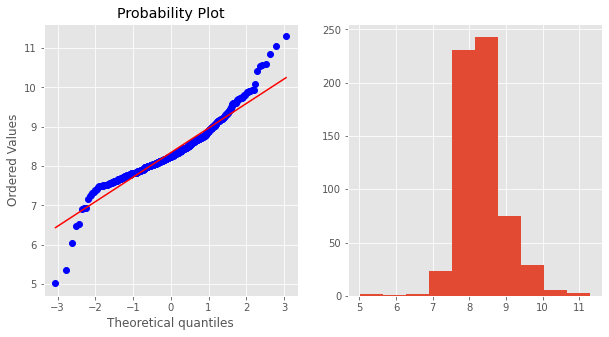

In [86]:
# apply log transformation.

train_copy = train.copy()

train_copy["ApplicantIncome"] = np.log(train_copy["ApplicantIncome"])
qq_plot(train_copy,"ApplicantIncome")

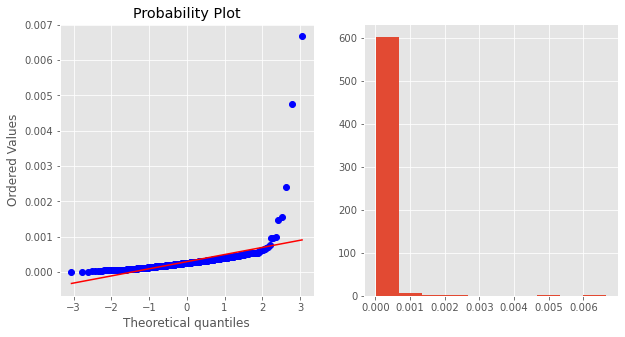

In [87]:
# apply reciprocal transformation.

train_copy = train.copy()

train_copy["ApplicantIncome"] = 1/(train_copy["ApplicantIncome"])
qq_plot(train_copy,"ApplicantIncome")

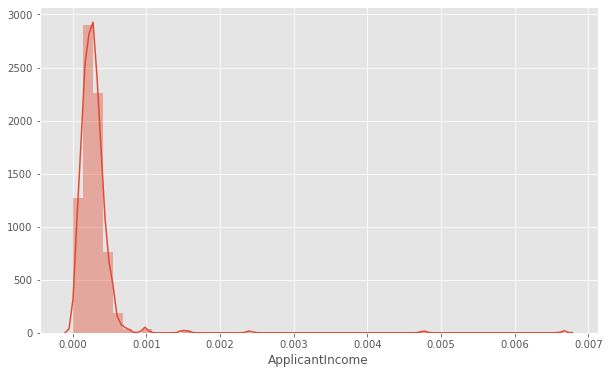

In [88]:
plt.figure(figsize=(10,6))

sns.distplot(train_copy["ApplicantIncome"])

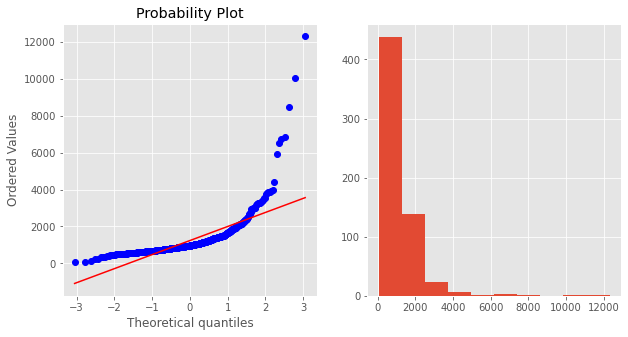

In [89]:
# apply exponential transformation.

train_copy = train.copy()

train_copy["ApplicantIncome"] = train_copy["ApplicantIncome"]**(1/1.2)
qq_plot(train_copy,"ApplicantIncome")

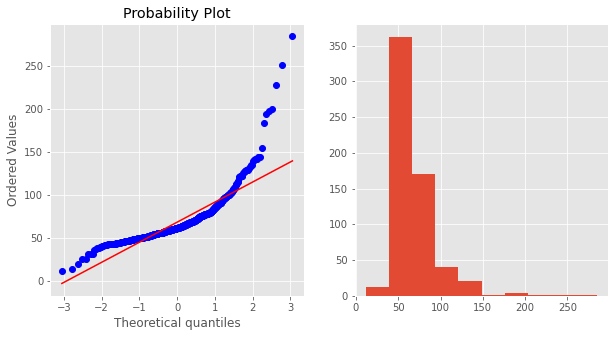

In [90]:
# apply square root transformation.

train_copy = train.copy()

train_copy["ApplicantIncome"] = train_copy["ApplicantIncome"]**(1/2)
qq_plot(train_copy,"ApplicantIncome")

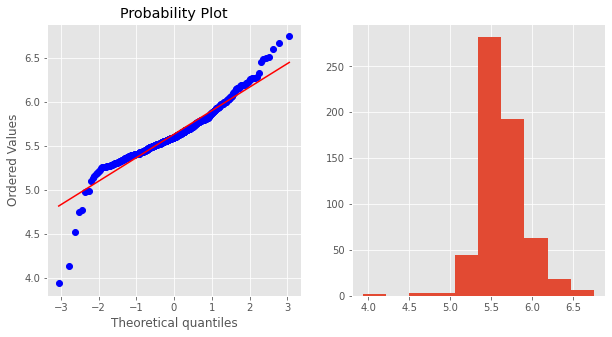

In [91]:
# apply boxcox transformation.

train_copy = train.copy()

train_copy["ApplicantIncome"], parameter = st.boxcox(train_copy["ApplicantIncome"])

qq_plot(train_copy,"ApplicantIncome")

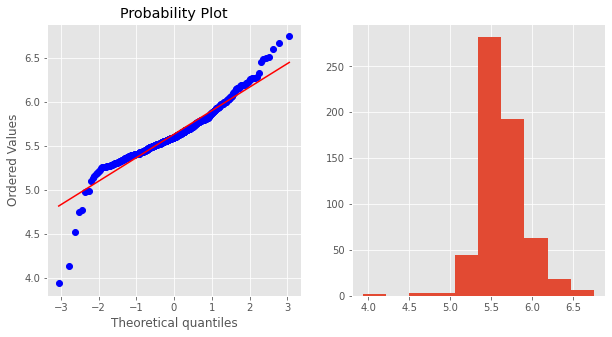

In [92]:
# After boxcox transformation distribution seems more normally distributed so apply this on main train dataset

train["ApplicantIncome"], parameter = st.boxcox(train["ApplicantIncome"])

qq_plot(train,"ApplicantIncome")

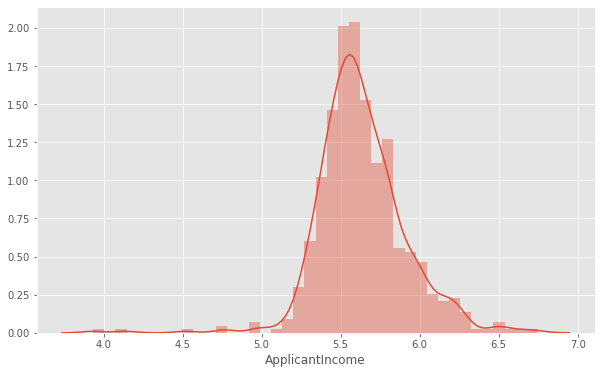

In [93]:
plt.figure(figsize=(10,6))

sns.distplot(train["ApplicantIncome"])

In [94]:
test["ApplicantIncome"].describe()

count      367.000000
mean      4805.599455
std       4910.685399
min          0.000000
25%       2864.000000
50%       3786.000000
75%       5060.000000
max      72529.000000
Name: ApplicantIncome, dtype: float64

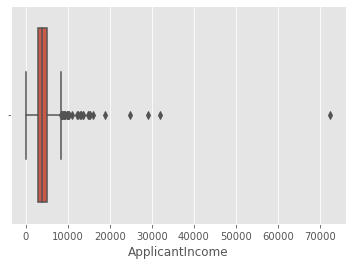

In [95]:
#Similarly check outlier and distribution for test dataset.

# check outliers by boxplot

sns.boxplot(test.ApplicantIncome)

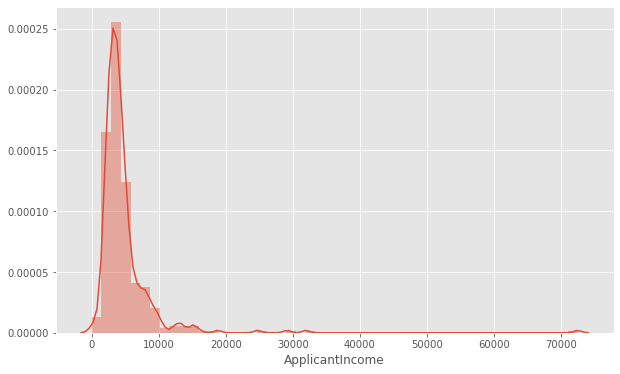

In [96]:
plt.figure(figsize=(10,6))

sns.distplot(test["ApplicantIncome"])

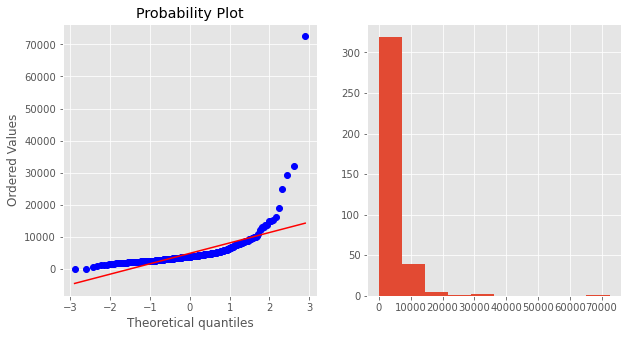

In [97]:
#check distribution by qq-plot.

qq_plot(test,"ApplicantIncome")

In [98]:
# detect outliers by mean+-3*standard_deviation

lower_boundary = test["ApplicantIncome"].mean()-3*test["ApplicantIncome"].std()
upper_boundary = test["ApplicantIncome"].mean()+3*test["ApplicantIncome"].std()

In [99]:
print(lower_boundary)
print(upper_boundary)

-9926.456741900322
19537.655651982066


In [100]:
#Greater than 19537 consider as outliers.

test.loc[test["ApplicantIncome"]>=19537,"ApplicantIncome"]=19537

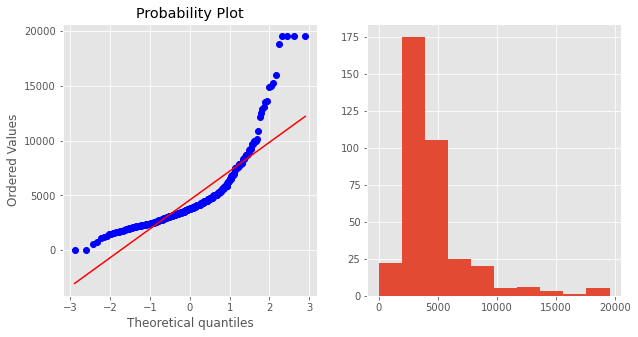

In [101]:
#Again check distribution by qq-plot.

qq_plot(test,"ApplicantIncome")

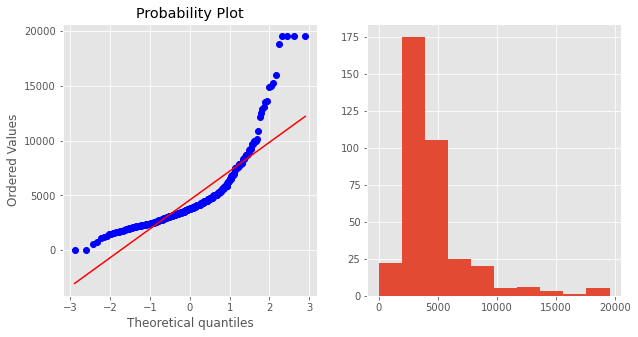

In [102]:
# apply log transformation.

test_copy = test.copy()

if 0 in test_copy["ApplicantIncome"].unique():
    pass
else:
    test_copy["ApplicantIncome"] = np.log(test_copy["ApplicantIncome"])
    
qq_plot(test_copy,"ApplicantIncome")

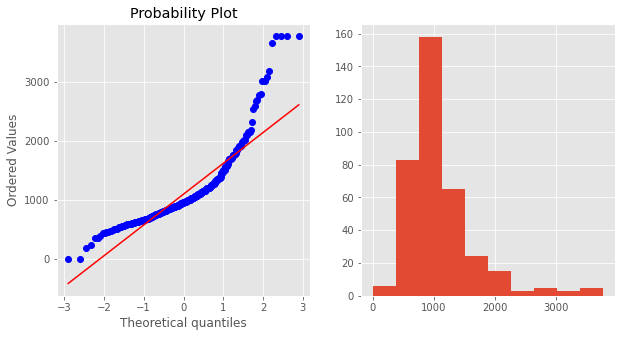

In [103]:
# apply exponential transformation.

test_copy = test.copy()

test_copy["ApplicantIncome"] = test_copy["ApplicantIncome"]**(1/1.2)
qq_plot(test_copy,"ApplicantIncome")

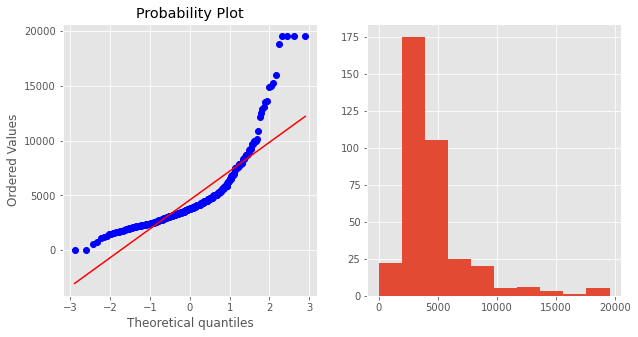

In [104]:
# apply reciprocal transformation.

test_copy = test.copy()

if 0 in test_copy["ApplicantIncome"].unique():
    pass
else:
    test_copy["ApplicantIncome"] = 1/(test_copy["ApplicantIncome"])
    
qq_plot(test_copy,"ApplicantIncome")

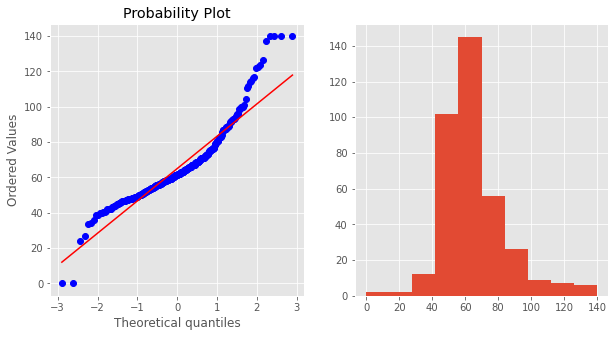

In [105]:
# apply square root transformation.

test_copy = test.copy()

test_copy["ApplicantIncome"] = test_copy["ApplicantIncome"]**(1/2)
qq_plot(test_copy,"ApplicantIncome")

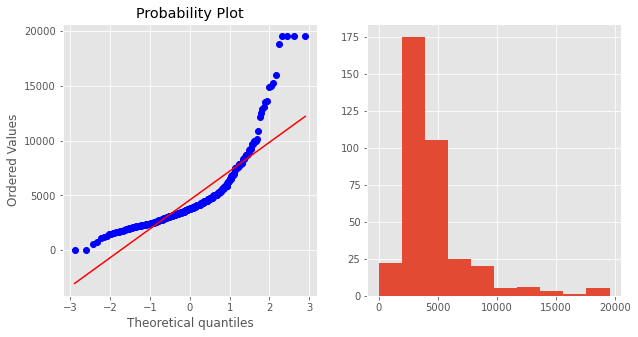

In [106]:
# apply boxcox transformation.

test_copy = test.copy()

if 0 in test_copy["ApplicantIncome"].unique():
    pass
else:
    test_copy["ApplicantIncome"], parameter = st.boxcox(test_copy["ApplicantIncome"])

qq_plot(test_copy,"ApplicantIncome")

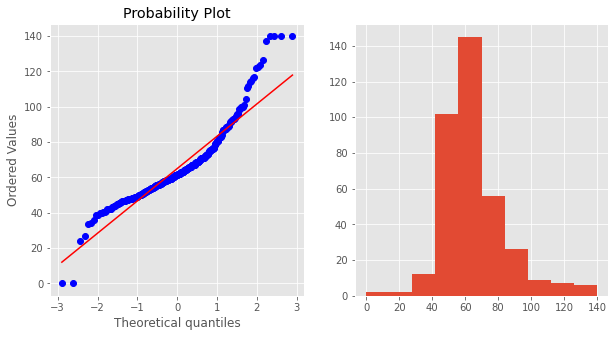

In [107]:
# after square root transformation distribution seems to be more normally distributed so apply on main test dataset.

test["ApplicantIncome"] = test["ApplicantIncome"]**(1/2)
qq_plot(test,"ApplicantIncome")

# Co-applicant Income Feature

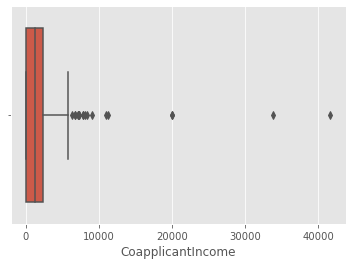

In [108]:
# check outliers by boxplot

sns.boxplot(train.CoapplicantIncome)

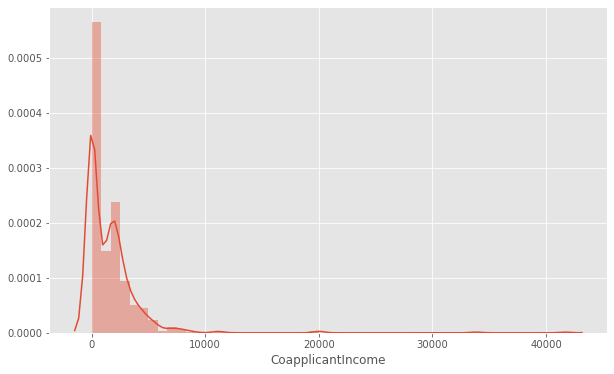

In [109]:
plt.figure(figsize=(10,6))

sns.distplot(train["CoapplicantIncome"])

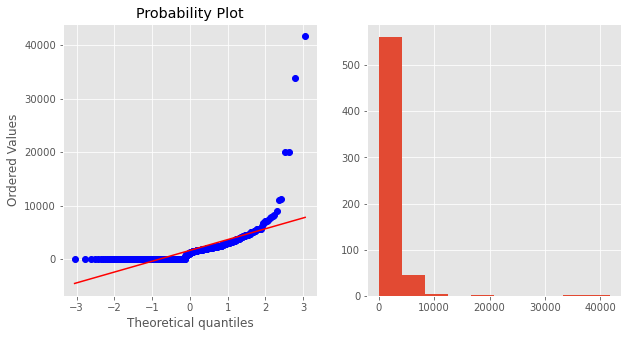

In [110]:
#check distribution by qq-plot.

qq_plot(train,"CoapplicantIncome")

In [111]:
# detect outliers by inter quantile range.

IQR = train["CoapplicantIncome"].quantile(0.75)-train["CoapplicantIncome"].quantile(0.25)

lower_boundary = train["CoapplicantIncome"].quantile(0.25)-1.5*IQR
upper_boundary = train["CoapplicantIncome"].quantile(0.75)+1.5*IQR

In [112]:
print(lower_boundary)
print(upper_boundary)

-3445.875
5743.125


In [113]:
#Greater than 5743.125 consider as outliers.

train.loc[train["CoapplicantIncome"]>=5743.125,"CoapplicantIncome"]=5743.125

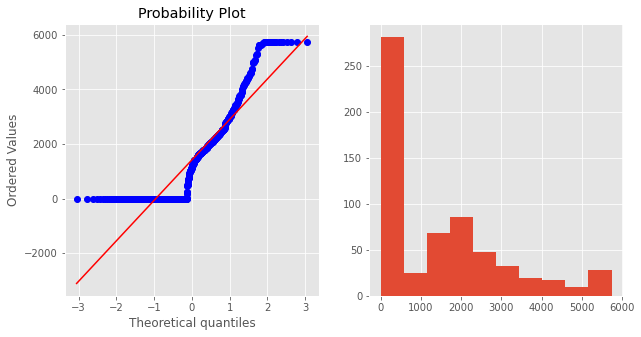

In [114]:
#Again check distribution by qq-plot.

qq_plot(train,"CoapplicantIncome")

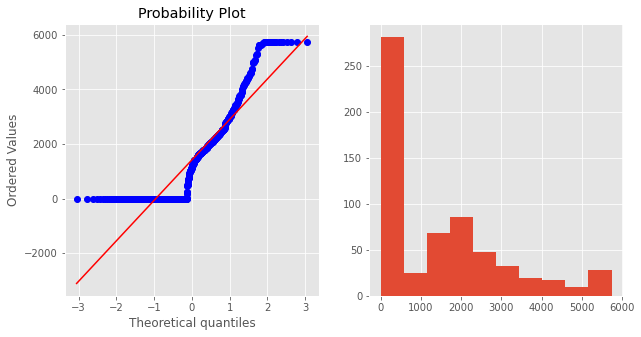

In [115]:
# apply log transformation.

train_copy = train.copy()

if 0 in train_copy["CoapplicantIncome"].unique():
    pass
else:
    train_copy["CoapplicantIncome"] = np.log(train_copy["CoapplicantIncome"])
    
qq_plot(train_copy,"CoapplicantIncome")

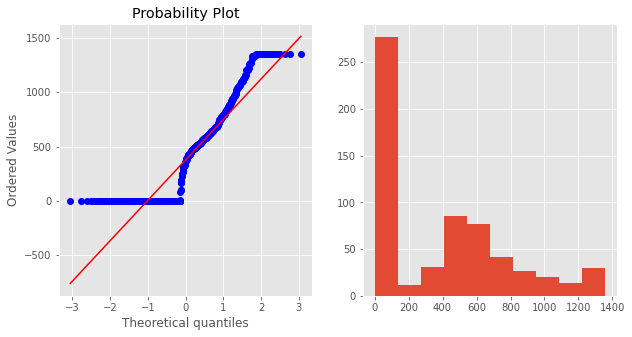

In [116]:
# apply exponential transformation.

train_copy = train.copy()

train_copy["CoapplicantIncome_exp"] = train_copy["CoapplicantIncome"]**(1/1.2)
qq_plot(train_copy,"CoapplicantIncome_exp")

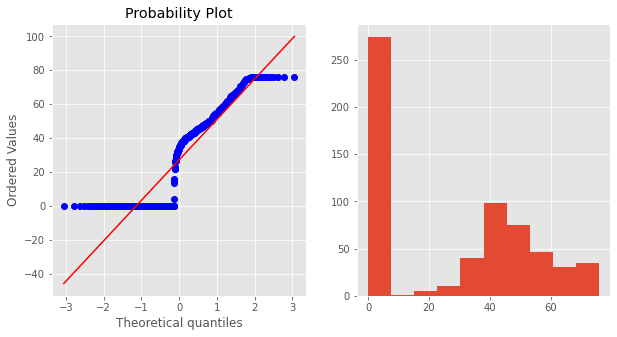

In [117]:
# apply Square root transformation.

train_copy = train.copy()

train_copy["CoapplicantIncome_sqrt"] = train_copy["CoapplicantIncome"]**(1/2)
qq_plot(train_copy,"CoapplicantIncome_sqrt")

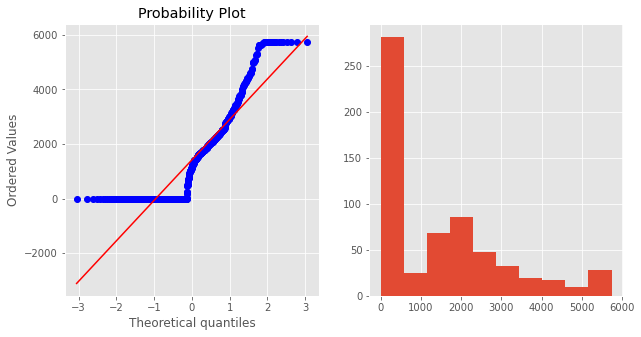

In [118]:
# apply reciprocal transformation.

train_copy = train.copy()

if 0 in train_copy["CoapplicantIncome"].unique():
    pass
else:
    train_copy["CoapplicantIncome"] = 1/(train_copy["CoapplicantIncome"])
    
qq_plot(train_copy,"CoapplicantIncome")

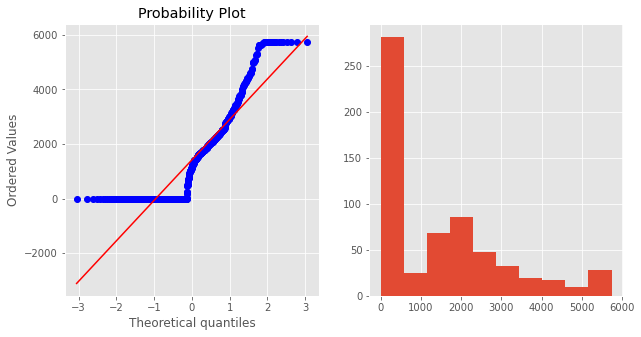

In [119]:
# apply boxcox transformation.

train_copy = train.copy()

if 0 in train_copy["CoapplicantIncome"].unique():
    pass
else:
    train_copy["CoapplicantIncome"], parameter = st.boxcox(train_copy["CoapplicantIncome"])

qq_plot(train_copy,"CoapplicantIncome")

After all Transformatioin does'nt seems to be normally distributed so no need to apply any transformation on CoapplicantIncome

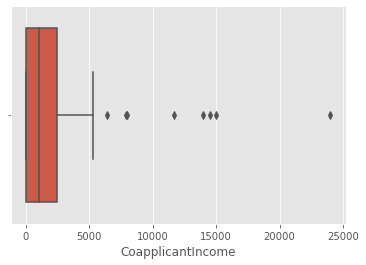

In [120]:
# similarly apply all transformation and outlier technique on test dataset.

# check outliers by boxplot

sns.boxplot(test.CoapplicantIncome)

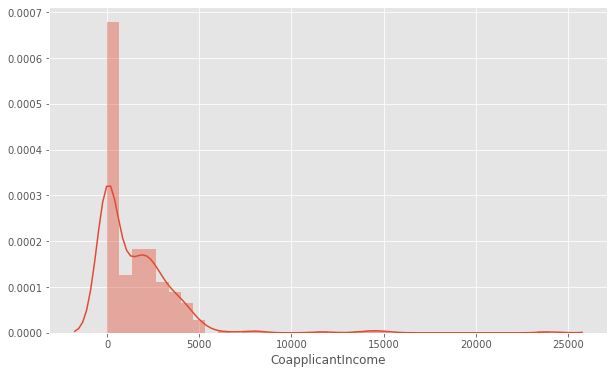

In [121]:
plt.figure(figsize=(10,6))

sns.distplot(test["CoapplicantIncome"])

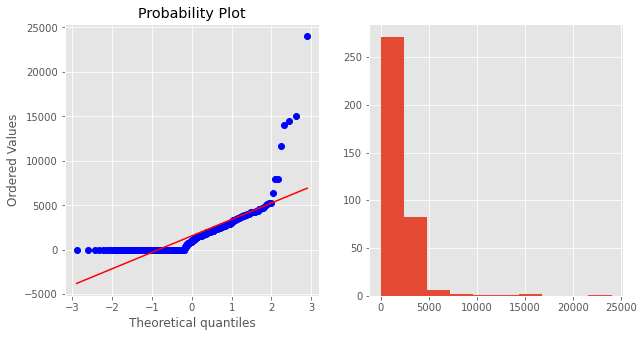

In [122]:
#check distribution by qq-plot.

qq_plot(test,"CoapplicantIncome")

In [123]:
# detect outliers by inter quantile range.

IQR = test["CoapplicantIncome"].quantile(0.75)-test["CoapplicantIncome"].quantile(0.25)

lower_boundary = test["CoapplicantIncome"].quantile(0.25)-1.5*IQR
upper_boundary = test["CoapplicantIncome"].quantile(0.75)+1.5*IQR

In [124]:
print(lower_boundary)
print(upper_boundary)

-3645.75
6076.25


In [125]:
#Greater than 6076.25 consider as outliers.

test.loc[test["CoapplicantIncome"]>=6076.25,"CoapplicantIncome"]=6076.25

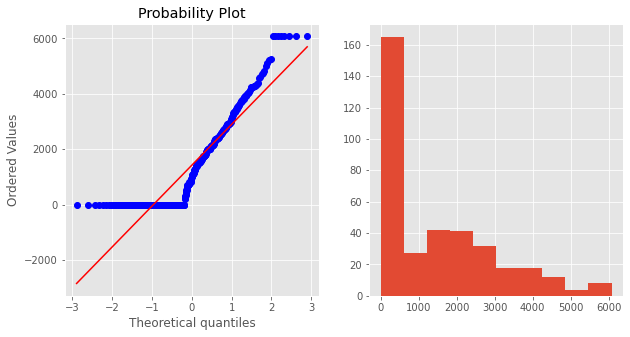

In [126]:
#Again check distribution by qq-plot.

qq_plot(test,"CoapplicantIncome")

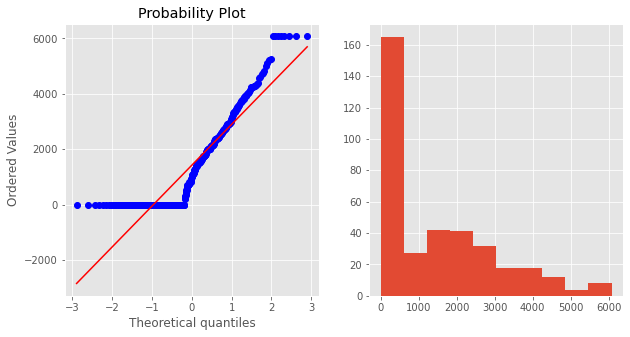

In [127]:
# apply log transformation.

test_copy = test.copy()

if 0 in test_copy["CoapplicantIncome"].unique():
    pass
else:
    test_copy["CoapplicantIncome"] = np.log(test_copy["CoapplicantIncome"])
    
qq_plot(test_copy,"CoapplicantIncome")

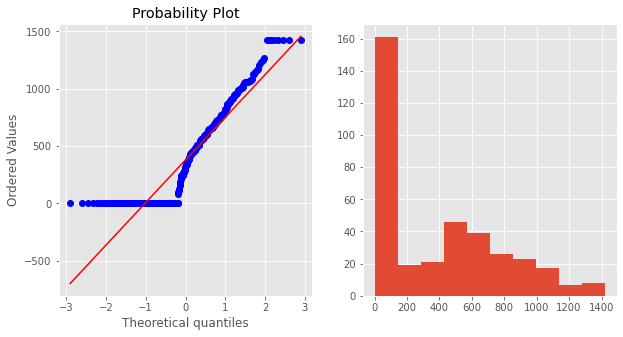

In [128]:
# apply exponential transformation.

test_copy = test.copy()

test_copy["CoapplicantIncome"] = test_copy["CoapplicantIncome"]**(1/1.2)
qq_plot(test_copy,"CoapplicantIncome")

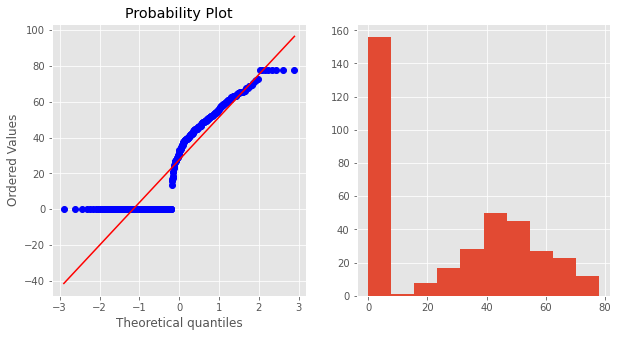

In [129]:
# apply square root transformation.

test_copy = test.copy()

test_copy["CoapplicantIncome"] = test_copy["CoapplicantIncome"]**(1/2)
qq_plot(test_copy,"CoapplicantIncome")

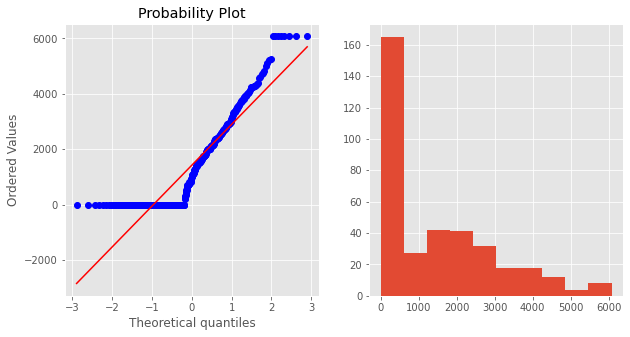

In [130]:
# apply reciprocal transformation.

test_copy = test.copy()

if 0 in test_copy["CoapplicantIncome"].unique():
    pass
else:
    test_copy["CoapplicantIncome"] = 1/(test_copy["CoapplicantIncome"])
    
qq_plot(test_copy,"CoapplicantIncome")

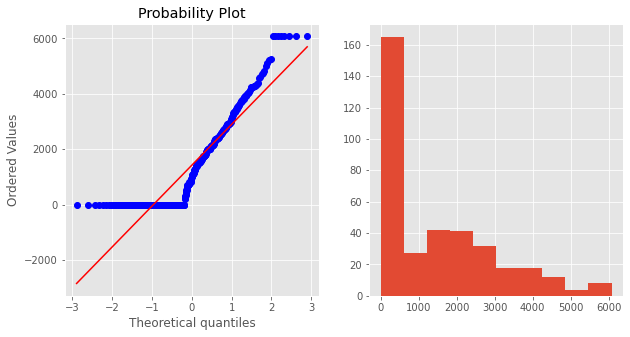

In [131]:
# apply boxcox transformation.

test_copy = test.copy()

if 0 in test_copy["CoapplicantIncome"].unique():
    pass
else:
    test_copy["CoapplicantIncome"], parameter = st.boxcox(train_copy["CoapplicantIncome"])

qq_plot(test_copy,"CoapplicantIncome")

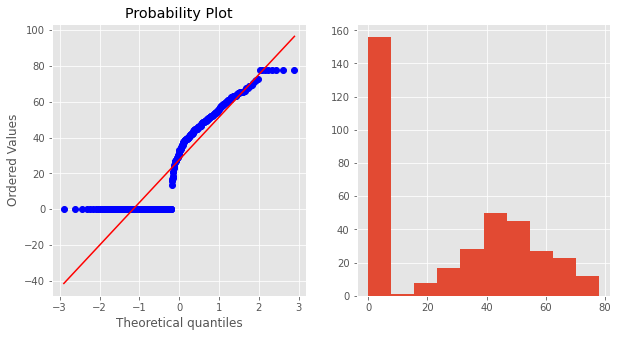

In [132]:
# After square root transformation distribution seems more normally distributed so apply this on main train dataset

test["CoapplicantIncome"] = test["CoapplicantIncome"]**(1/2)
qq_plot(test,"CoapplicantIncome")

# Loan Amount feature

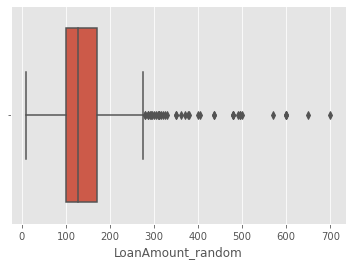

In [133]:
# check outliers by boxplot

sns.boxplot(train.LoanAmount_random)

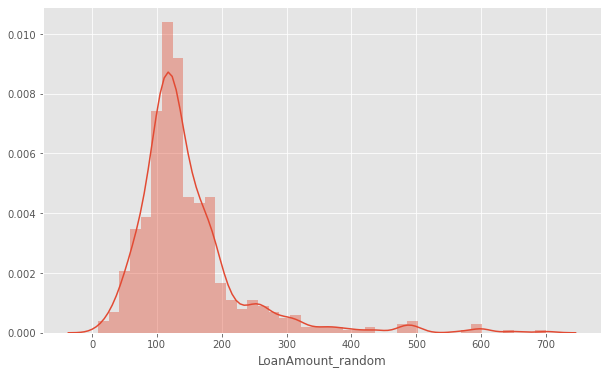

In [134]:
plt.figure(figsize=(10,6))

sns.distplot(train["LoanAmount_random"])

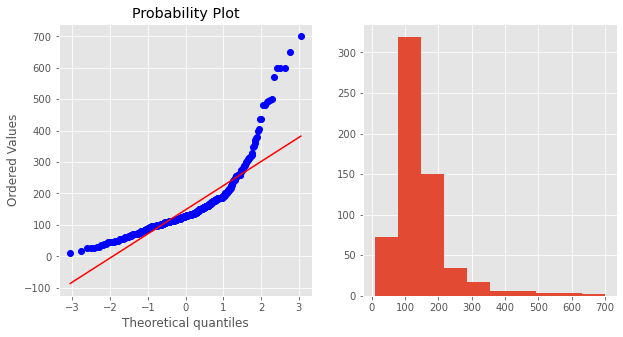

In [135]:
#check distribution by qq-plot.

qq_plot(train,"LoanAmount_random")

In [136]:
# detect outliers by mean+-3*standard_deviation

lower_boundary = train["LoanAmount_random"].mean()-3*train["LoanAmount_random"].std()
upper_boundary = train["LoanAmount_random"].mean()+3*train["LoanAmount_random"].std()

In [137]:
print(lower_boundary)
print(upper_boundary)

-114.67789317530509
410.8114436639044


In [138]:
#Greater than 410.81 consider as outliers.

train.loc[train["LoanAmount_random"]>=410.81,"LoanAmount_random"]=410.81

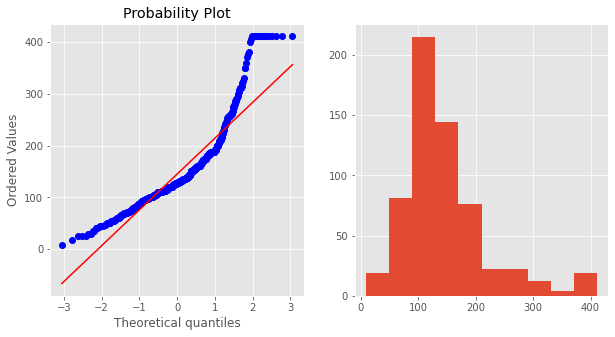

In [139]:
#Again check distribution by qq-plot.

qq_plot(train,"LoanAmount_random")

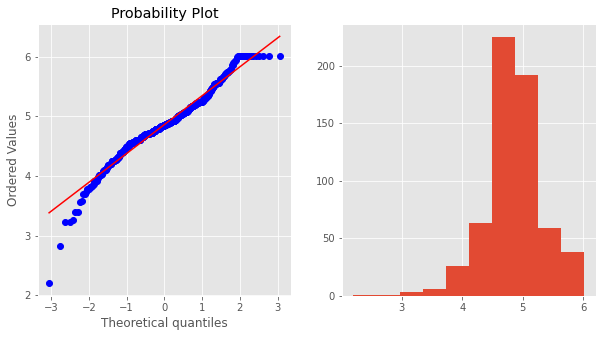

In [140]:
# apply log transformation.

train_copy = train.copy()

if 0 in train_copy["LoanAmount_random"].unique():
    pass
else:
    train_copy["LoanAmount_random"] = np.log(train_copy["LoanAmount_random"])
    
qq_plot(train_copy,"LoanAmount_random")

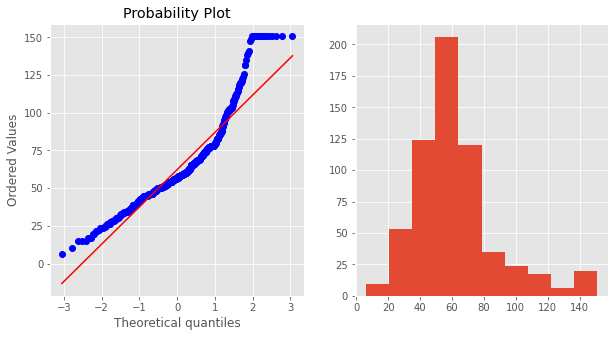

In [141]:
# apply exponential transformation.

train_copy = train.copy()

train_copy["LoanAmount_random"] = train_copy["LoanAmount_random"]**(1/1.2)
qq_plot(train_copy,"LoanAmount_random")

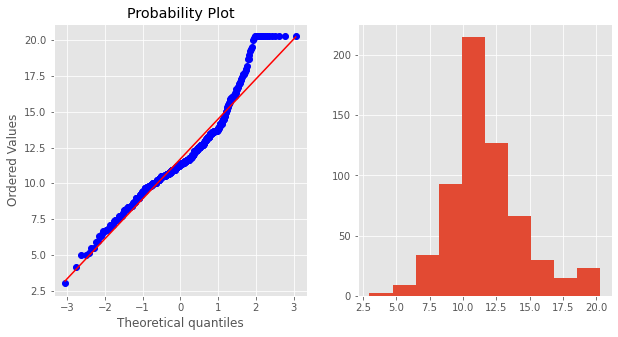

In [142]:
# apply square root transformation.

train_copy = train.copy()

train_copy["LoanAmount_random"] = train_copy["LoanAmount_random"]**(1/2)
qq_plot(train_copy,"LoanAmount_random")


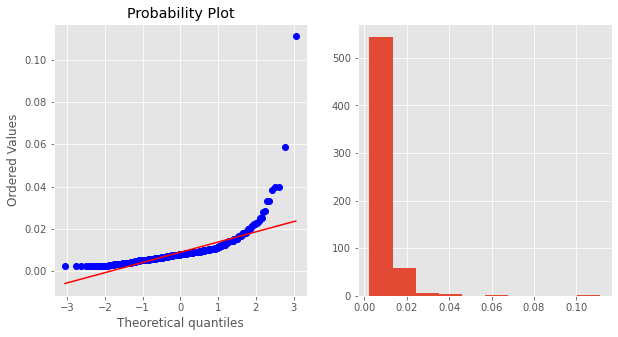

In [143]:
# apply reciprocal transformation.

train_copy = train.copy()

if 0 in train_copy["LoanAmount_random"].unique():
    pass
else:
    train_copy["LoanAmount_random"] = 1/(train_copy["LoanAmount_random"])
    
qq_plot(train_copy,"LoanAmount_random")

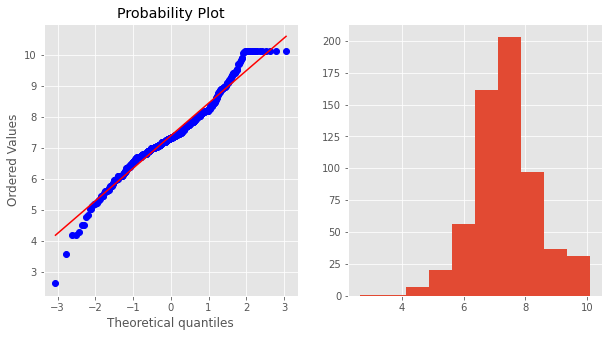

In [144]:
# apply boxcox transformation.

train_copy = train.copy()

if 0 in train_copy["LoanAmount_random"].unique():
    pass
else:
    train_copy["LoanAmount_random"], parameter = st.boxcox(train_copy["LoanAmount_random"])

qq_plot(train_copy,"LoanAmount_random")

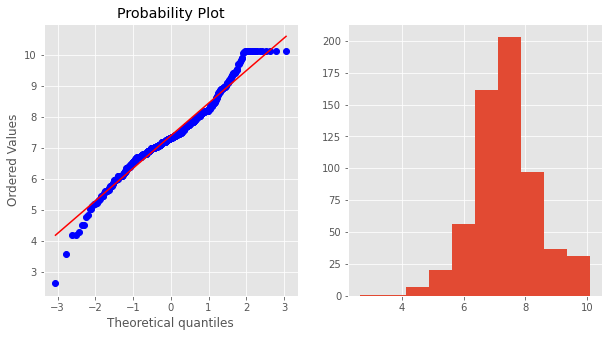

In [145]:
# After boxcox transformation distribution seems more normally distributed so apply this on main train dataset

if 0 in train["LoanAmount_random"].unique():
    pass
else:
    train["LoanAmount_random"], parameter = st.boxcox(train["LoanAmount_random"])

qq_plot(train,"LoanAmount_random")

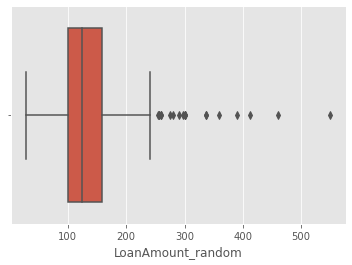

In [146]:
# similarly apply all transformation and outlier technique on test dataset.

# check outliers by boxplot

sns.boxplot(test.LoanAmount_random)

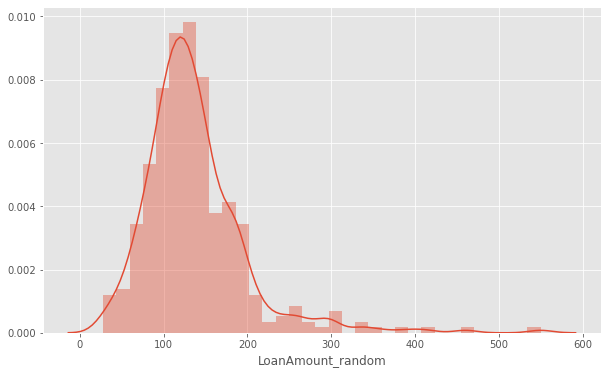

In [147]:
plt.figure(figsize=(10,6))

sns.distplot(test["LoanAmount_random"])

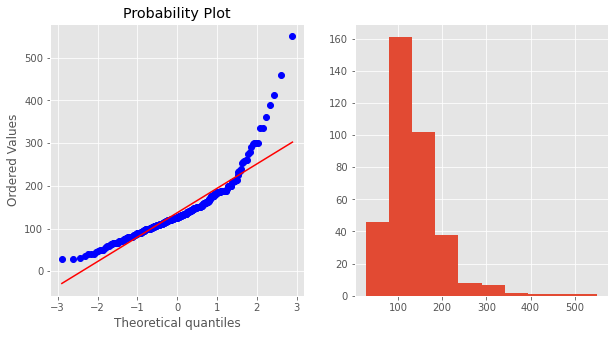

In [148]:
#check distribution by qq-plot.

qq_plot(test,"LoanAmount_random")

In [149]:
# detect outliers by mean+-3*standard_deviation

lower_boundary = test["LoanAmount_random"].mean()-3*test["LoanAmount_random"].std()
upper_boundary = test["LoanAmount_random"].mean()+3*test["LoanAmount_random"].std()

In [150]:
print(lower_boundary)
print(upper_boundary)

-48.956272558566184
322.66199462941086


In [151]:
#Greater than 322.66 consider as outliers.

test.loc[test["LoanAmount_random"]>=322.66,"LoanAmount_random"]=322.66

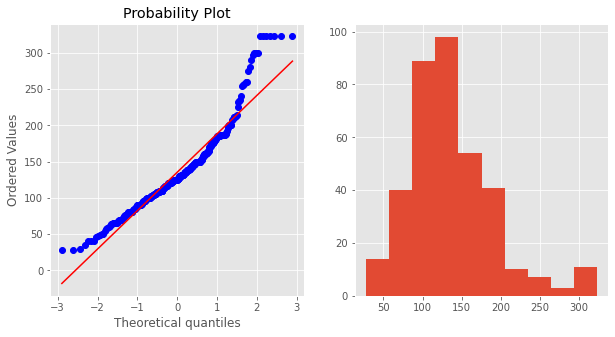

In [152]:
#Again check distribution by qq-plot.

qq_plot(test,"LoanAmount_random")

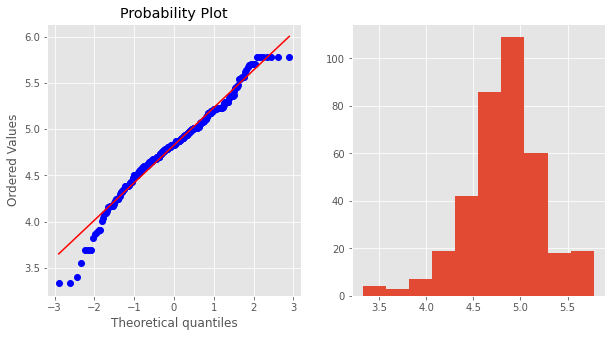

In [153]:
# apply log transformation.

test_copy = test.copy()

if 0 in test_copy["LoanAmount_random"].unique():
    pass
else:
    test_copy["LoanAmount_random"] = np.log(test_copy["LoanAmount_random"])
    
qq_plot(test_copy,"LoanAmount_random")

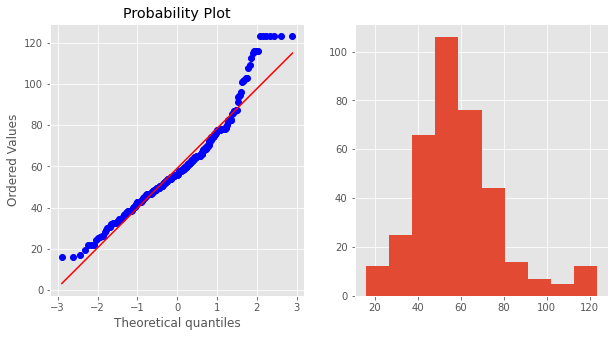

In [154]:
# apply exponential transformation.

test_copy = test.copy()

test_copy["LoanAmount_random"] = test_copy["LoanAmount_random"]**(1/1.2)
qq_plot(test_copy,"LoanAmount_random")

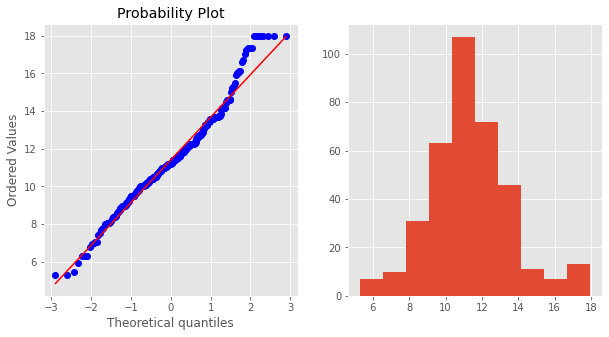

In [155]:
# apply square root transformation.

test_copy = test.copy()

test_copy["LoanAmount_random"] = test_copy["LoanAmount_random"]**(1/2)
qq_plot(test_copy,"LoanAmount_random")

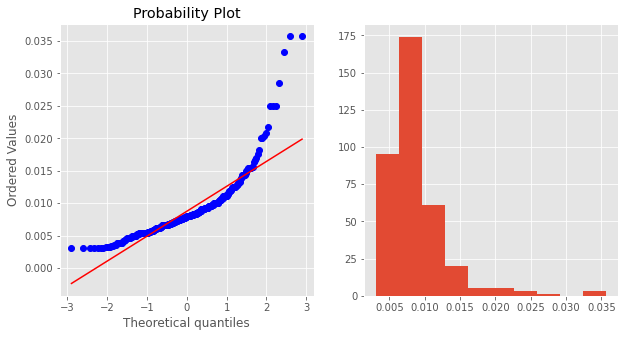

In [156]:
# apply reciprocal transformation.

test_copy = test.copy()

if 0 in test_copy["LoanAmount_random"].unique():
    pass
else:
    test_copy["LoanAmount_random"] = 1/(test_copy["LoanAmount_random"])
    
qq_plot(test_copy,"LoanAmount_random")

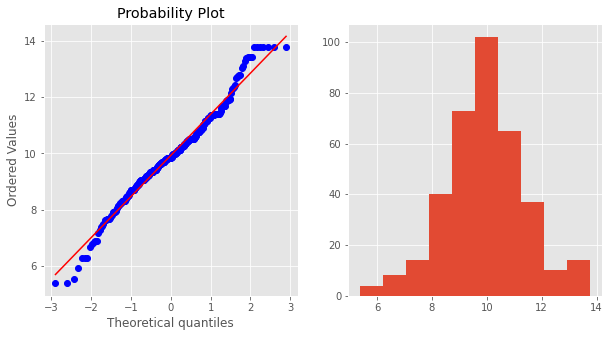

In [157]:
# apply boxcox transformation.

test_copy = test.copy()

if 0 in test_copy["LoanAmount_random"].unique():
    pass
else:
    test_copy["LoanAmount_random"], parameter = st.boxcox(test_copy["LoanAmount_random"])

qq_plot(test_copy,"LoanAmount_random")

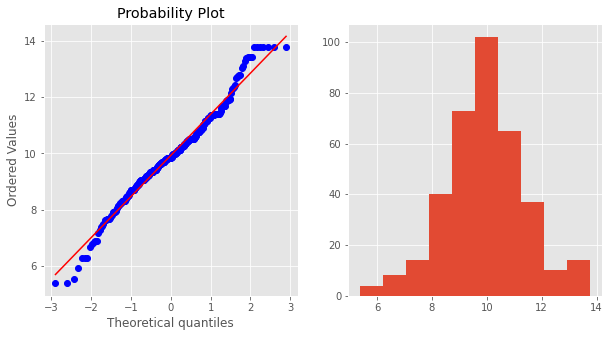

In [158]:
# After boxcox transformation distribution seems more normally distributed so apply this on main train dataset

if 0 in test["LoanAmount_random"].unique():
    pass
else:
    test["LoanAmount_random"], parameter = st.boxcox(test["LoanAmount_random"])

qq_plot(test,"LoanAmount_random")

In [159]:
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_random
0,LP001002,Male,No,0,Graduate,No,5.784390,0.0,360.0,1.0,Urban,Y,8.915421
1,LP001003,Male,Yes,1,Graduate,No,5.681299,1508.0,360.0,1.0,Rural,N,7.332404
2,LP001005,Male,Yes,0,Graduate,Yes,5.496074,0.0,360.0,1.0,Urban,Y,5.966962
3,LP001006,Male,Yes,0,Not Graduate,No,5.428743,2358.0,360.0,1.0,Urban,Y,7.192913
4,LP001008,Male,No,0,Graduate,No,5.795017,0.0,360.0,1.0,Urban,Y,7.544186
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,5.480911,0.0,360.0,1.0,Rural,Y,6.110503
610,LP002979,Male,Yes,3+,Graduate,No,5.634015,0.0,180.0,1.0,Rural,Y,5.026513
611,LP002983,Male,Yes,1,Graduate,No,5.916714,240.0,360.0,1.0,Urban,Y,8.896333
612,LP002984,Male,Yes,2,Graduate,No,5.891378,0.0,360.0,1.0,Urban,Y,8.181438


# Handle Categorical Feature

In [160]:
#check unique values in Dependents.
train["Dependents"].unique()

array(['0', '1', '2', '3+', 0], dtype=object)

In [161]:
test["Dependents"].unique()

array(['0', '1', '2', '3+', 0], dtype=object)

In [162]:
#In Dependents column +3 replace by 3 in train and test dataset.

train.replace({"Dependents":"3+"},3,inplace=True)
test.replace({"Dependents":"3+"},3,inplace=True)

In [163]:
#Target Feature contain object and it should be in float or in integer.

train['Loan_Status'] = [1 if x=='Y' else 0 for x in train['Loan_Status']]

In [164]:
#Dependents feature having numerical values, but it show's object so change it into integer.

train["Dependents"] = train.Dependents.astype(float)
test["Dependents"] = test.Dependents.astype(float)

In [165]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    float64
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    float64
 7   CoapplicantIncome  614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    int64  
 12  LoanAmount_random  614 non-null    float64
dtypes: float64(6), int64(1), object(6)
memory usage: 62.5+ KB


In [166]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             367 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         367 non-null    float64
 4   Education          367 non-null    object 
 5   Self_Employed      367 non-null    object 
 6   ApplicantIncome    367 non-null    float64
 7   CoapplicantIncome  367 non-null    float64
 8   Loan_Amount_Term   367 non-null    float64
 9   Credit_History     367 non-null    float64
 10  Property_Area      367 non-null    object 
 11  LoanAmount_random  367 non-null    float64
dtypes: float64(6), object(6)
memory usage: 34.5+ KB


In [167]:
# Education column contain a ordinal values so apply ordinal encoding.

rank = {"Graduate":2,"Not Graduate":1}

train["Education"] = train["Education"].map(rank)


test["Education"] = test["Education"].map(rank)

In [168]:
#drop Loan_ID columns it's unique id for each applicant.

train = train.drop("Loan_ID",axis=1)
test = test.drop("Loan_ID",axis=1)

In [169]:
# Nominal Categorical features change into dummies variables.

train = pd.get_dummies(train, drop_first=True)
test = pd.get_dummies(test, drop_first=True)

In [170]:
train

,Dependents,Education,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Loan_Status,LoanAmount_random,Gender_Male,Married_Yes,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,0.0,2,5.784390,0.0,360.0,1.0,1,8.915421,1,0,0,0,1
1,1.0,2,5.681299,1508.0,360.0,1.0,0,7.332404,1,1,0,0,0
2,0.0,2,5.496074,0.0,360.0,1.0,1,5.966962,1,1,1,0,1
3,0.0,1,5.428743,2358.0,360.0,1.0,1,7.192913,1,1,0,0,1
4,0.0,2,5.795017,0.0,360.0,1.0,1,7.544186,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,2,5.480911,0.0,360.0,1.0,1,6.110503,0,0,0,0,0
610,3.0,2,5.634015,0.0,180.0,1.0,1,5.026513,1,1,0,0,0
611,1.0,2,5.916714,240.0,360.0,1.0,1,8.896333,1,1,0,0,1
612,2.0,2,5.891378,0.0,360.0,1.0,1,8.181438,1,1,0,0,1


In [171]:
# Split Independent and dependent feature from training dataset.

x_df = train.drop("Loan_Status",axis=1)
y_df = train["Loan_Status"]

# Feature Scaling

In [172]:
from sklearn.preprocessing import StandardScaler

In [173]:
scaling = StandardScaler()
train_scaling = scaling.fit_transform(x_df,y_df)
train_scaling

array([[-0.73780632,  0.52836225,  0.54412656, ..., -0.39260074,
        -0.7820157 ,  1.42814704],
       [ 0.25346957,  0.52836225,  0.17081118, ..., -0.39260074,
        -0.7820157 , -0.70020801],
       [-0.73780632,  0.52836225, -0.4999338 , ...,  2.54711697,
        -0.7820157 ,  1.42814704],
       ...,
       [ 0.25346957,  0.52836225,  1.02330324, ..., -0.39260074,
        -0.7820157 ,  1.42814704],
       [ 1.24474546,  0.52836225,  0.93155565, ..., -0.39260074,
        -0.7820157 ,  1.42814704],
       [-0.73780632,  0.52836225,  0.17081118, ...,  2.54711697,
         1.2787467 , -0.70020801]])

In [174]:
x_df = pd.DataFrame(train_scaling,columns=x_df.columns)
x_df

,Dependents,Education,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,LoanAmount_random,Gender_Male,Married_Yes,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,-0.737806,0.528362,0.544127,-0.874587,0.273231,0.411733,1.437048,0.472343,-1.372089,-0.392601,-0.782016,1.428147
1,0.253470,0.528362,0.170811,0.054395,0.273231,0.411733,-0.056444,0.472343,0.728816,-0.392601,-0.782016,-0.700208
2,-0.737806,0.528362,-0.499934,-0.874587,0.273231,0.411733,-1.344666,0.472343,0.728816,2.547117,-0.782016,1.428147
3,-0.737806,-1.892641,-0.743757,0.578025,0.273231,0.411733,-0.188047,0.472343,0.728816,-0.392601,-0.782016,1.428147
4,-0.737806,0.528362,0.582611,-0.874587,0.273231,0.411733,0.143361,0.472343,-1.372089,-0.392601,-0.782016,1.428147
...,...,...,...,...,...,...,...,...,...,...,...,...
609,-0.737806,0.528362,-0.554844,-0.874587,0.273231,0.411733,-1.209243,-2.117107,-1.372089,-0.392601,-0.782016,-0.700208
610,2.236021,0.528362,-0.000418,-0.874587,-2.522836,0.411733,-2.231929,0.472343,0.728816,-0.392601,-0.782016,-0.700208
611,0.253470,0.528362,1.023303,-0.726739,0.273231,0.411733,1.419039,0.472343,0.728816,-0.392601,-0.782016,1.428147
612,1.244745,0.528362,0.931556,-0.874587,0.273231,0.411733,0.744574,0.472343,0.728816,-0.392601,-0.782016,1.428147


In [175]:
#similarly apply scaling on test dataset.

test_scaling = scaling.transform(test)
test_scaling

array([[-7.37806323e-01,  5.28362249e-01,  2.53474511e+02, ...,
        -3.92600737e-01, -7.82015701e-01,  1.42814704e+00],
       [ 2.53469568e-01,  5.28362249e-01,  1.80437725e+02, ...,
        -3.92600737e-01, -7.82015701e-01,  1.42814704e+00],
       [ 1.24474546e+00,  5.28362249e-01,  2.35657984e+02, ...,
        -3.92600737e-01, -7.82015701e-01,  1.42814704e+00],
       ...,
       [-7.37806323e-01,  5.28362249e-01,  1.86040051e+02, ...,
        -3.92600737e-01,  1.27874670e+00, -7.00208013e-01],
       [-7.37806323e-01,  5.28362249e-01,  2.35657984e+02, ...,
        -3.92600737e-01, -7.82015701e-01, -7.00208013e-01],
       [-7.37806323e-01,  5.28362249e-01,  3.26934859e+02, ...,
         2.54711697e+00, -7.82015701e-01, -7.00208013e-01]])

In [176]:
test = pd.DataFrame(test_scaling,columns=test.columns)
test

,Dependents,Education,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,LoanAmount_random,Gender_Male,Married_Yes,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,-0.737806,0.528362,253.474511,-0.874587,0.273231,0.411733,1.891203,0.472343,0.728816,-0.392601,-0.782016,1.428147
1,0.253470,0.528362,180.437725,-0.850728,0.273231,0.411733,2.349203,0.472343,0.728816,-0.392601,-0.782016,1.428147
2,1.244745,0.528362,235.657984,-0.848451,0.273231,0.411733,4.191146,0.472343,0.728816,-0.392601,-0.782016,1.428147
3,1.244745,0.528362,154.769805,-0.843503,0.273231,0.411733,1.579543,0.472343,0.728816,-0.392601,-0.782016,1.428147
4,-0.737806,-1.892641,186.864177,-0.874587,0.273231,0.411733,0.803427,0.472343,-1.372089,-0.392601,-0.782016,1.428147
...,...,...,...,...,...,...,...,...,...,...,...,...
362,2.236021,-1.892641,208.882465,-0.848619,0.273231,0.411733,1.980635,0.472343,0.728816,2.547117,-0.782016,1.428147
363,-0.737806,0.528362,213.104440,-0.858184,0.273231,0.411733,2.039294,0.472343,0.728816,-0.392601,-0.782016,1.428147
364,-0.737806,0.528362,186.040051,-0.847086,0.273231,0.411733,2.349203,0.472343,-1.372089,-0.392601,1.278747,-0.700208
365,-0.737806,0.528362,235.657984,-0.844452,0.273231,0.411733,3.150362,0.472343,0.728816,-0.392601,-0.782016,-0.700208


In [227]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve,accuracy_score

In [178]:
# split train validation data.

x_train,x_valid,y_train,y_valid = train_test_split(x_df,y_df,test_size=0.3, random_state=5)

Apply Logistic Regression

In [289]:
logit_model = LogisticRegression()
logit_model.fit(x_train,y_train)

LogisticRegression(C=10)

In [290]:
# prediciton on validation data
logit_predicition = logit_model.predict(x_valid)

In [288]:
# Accuracy Score.
accuracy_score(y_valid,logit_predicition)

0.8378378378378378

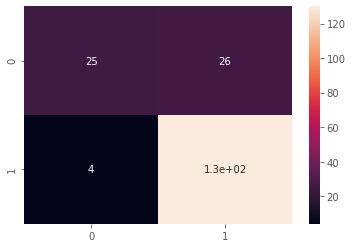

In [256]:
# Make Confusion matrix.

sns.heatmap(confusion_matrix(y_valid,logit_predicition),annot=True)

In [257]:
print(classification_report(y_valid,logit_predicition))

              precision    recall  f1-score   support

           0       0.86      0.49      0.62        51
           1       0.83      0.97      0.90       134

    accuracy                           0.84       185
   macro avg       0.85      0.73      0.76       185
weighted avg       0.84      0.84      0.82       185



# Hyperparameter Tuning

In [316]:
param = {"penalty" : ['l1', 'l2', 'none'],
"C" : [0.00001,0.001,0.01,0.05,0.1,0.5,0.8,1,3,5,7,8,10,12,15,18,20,25,30,50,100,120,130,145,200,300,400,500,1000,5000]}

In [317]:
logit_rdm_cv = RandomizedSearchCV(logit_model,param_distributions=param,verbose=5,n_jobs=-1,cv=5,n_iter=50)
logit_rdm_cv.fit(x_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    0.5s finished


RandomizedSearchCV(cv=5, estimator=LogisticRegression(C=10), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'C': [1e-05, 0.001, 0.01, 0.05, 0.1,
                                              0.5, 0.8, 1, 3, 5, 7, 8, 10, 12,
                                              15, 18, 20, 25, 30, 50, 100, 120,
                                              130, 145, 200, 300, 400, 500,
                                              1000, 5000],
                                        'penalty': ['l1', 'l2', 'none']},
                   verbose=5)

In [318]:
logit_rdm_cv.best_params_

{'penalty': 'l2', 'C': 0.5}

In [319]:
logit_rdm_cv.best_estimator_

LogisticRegression(C=0.5)

In [320]:
logit_rdm_cv.best_score_

0.7995896032831737

In [321]:
logit_rdm_prediction = logit_rdm_cv.predict(x_valid)

In [322]:
accuracy_score(y_valid,logit_rdm_prediction)

0.8378378378378378

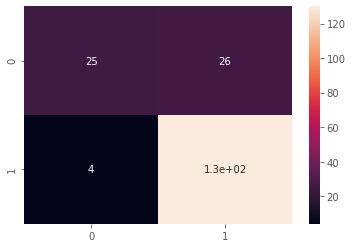

In [323]:
sns.heatmap(confusion_matrix(y_valid,logit_rdm_prediction),annot=True)

In [269]:
print(classification_report(y_valid,logit_rdm_prediction))

              precision    recall  f1-score   support

           0       0.86      0.49      0.62        51
           1       0.83      0.97      0.90       134

    accuracy                           0.84       185
   macro avg       0.85      0.73      0.76       185
weighted avg       0.84      0.84      0.82       185



The performance of our model with accuracy of 84%, precision of 83% and recall of 97%

Prediction on Test Dataset

In [277]:
test_pred = logit_rdm_cv.predict(test)

In [278]:
test_pred = pd.DataFrame(test_pred.astype(int))
test_pred.columns = ["Loan_Status"]

In [279]:
status = {0:"N",1:"Y"}
test_pred["Loan_Status"] = test_pred["Loan_Status"].map(status)

In [280]:
submission_file = pd.read_csv("sample_submission.csv")
dataset = pd.concat([submission_file["Loan_ID"],test_pred],axis=1)
dataset.to_csv("loan_prediction_output_new.csv",index=False)